0.004 K parameters


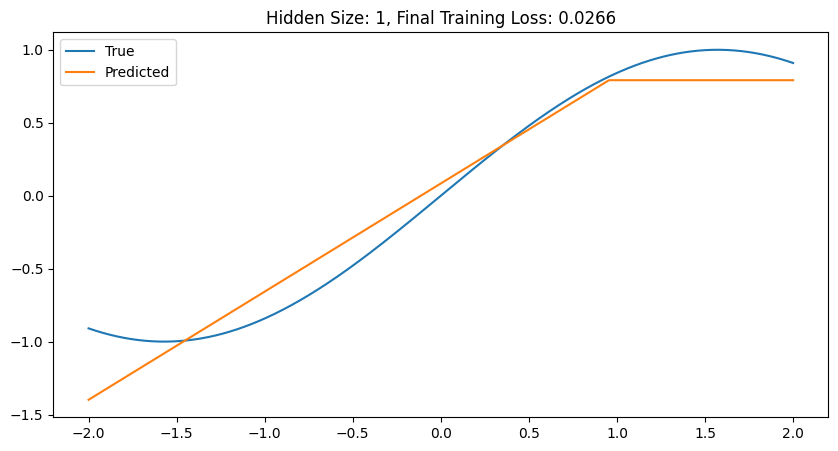

0.007 K parameters


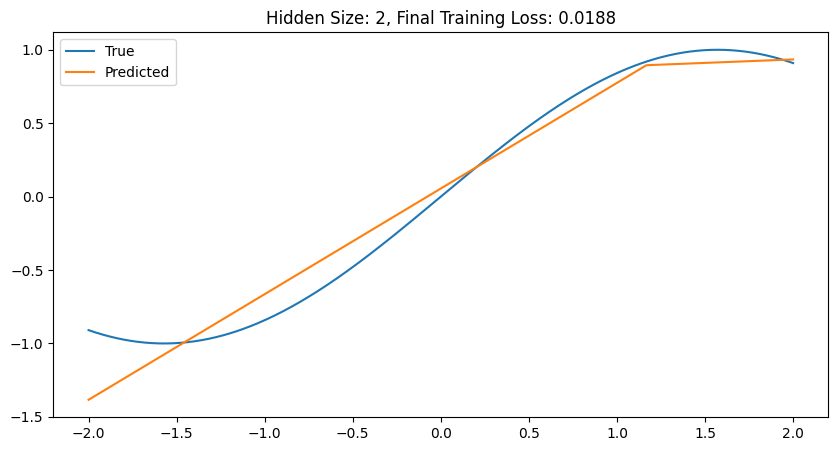

0.01 K parameters


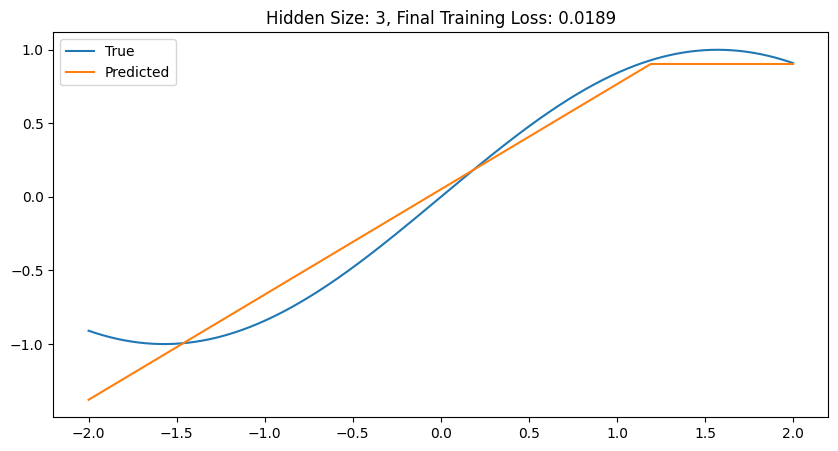

0.013 K parameters


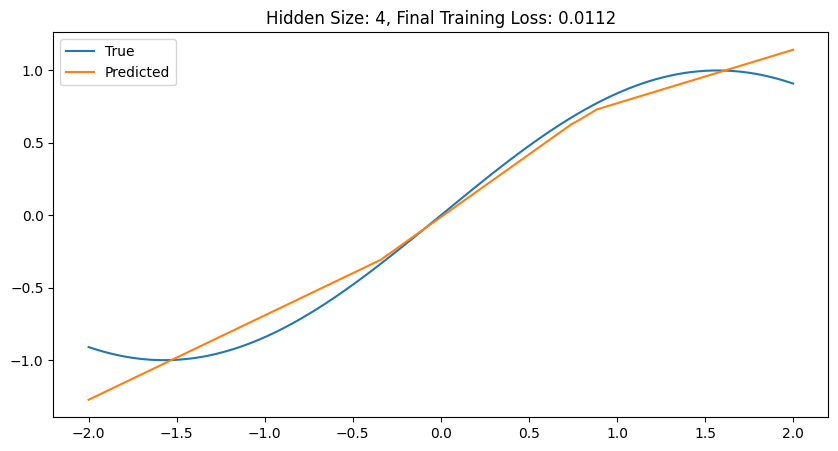

0.016 K parameters


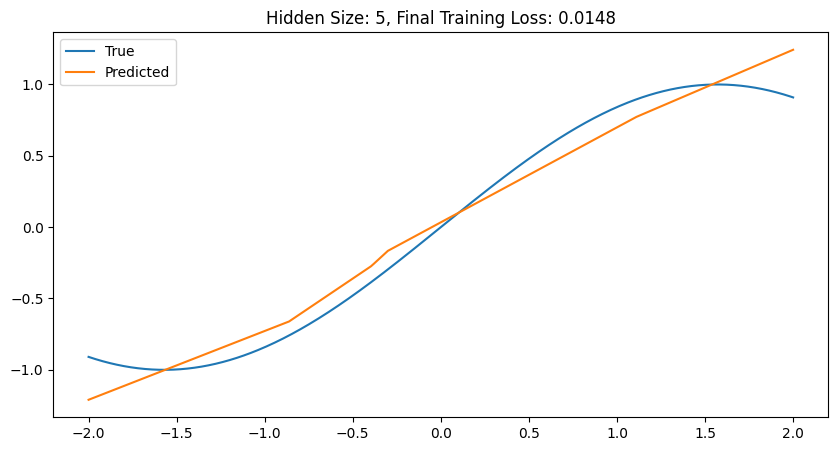

0.019 K parameters


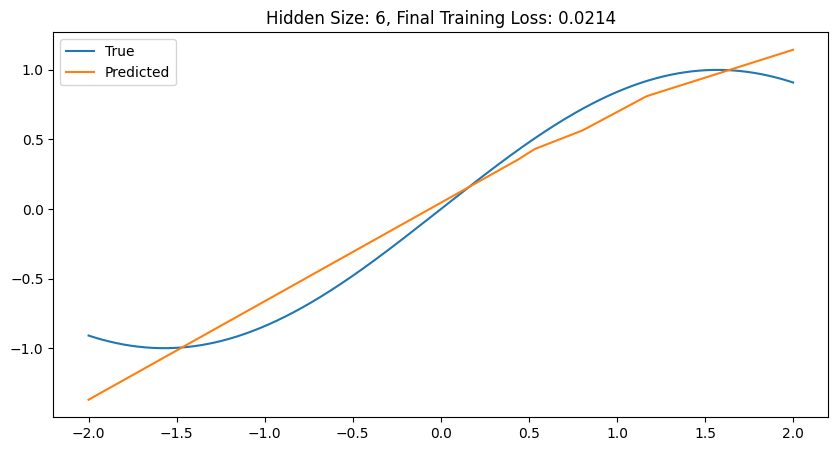

0.022 K parameters


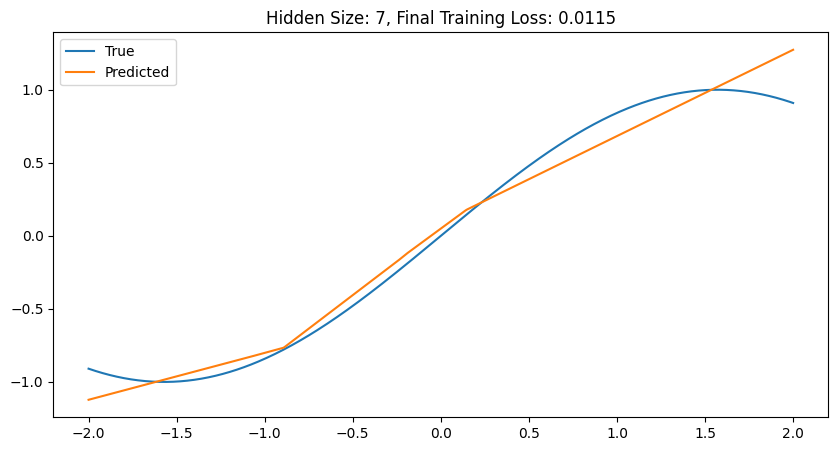

0.025 K parameters


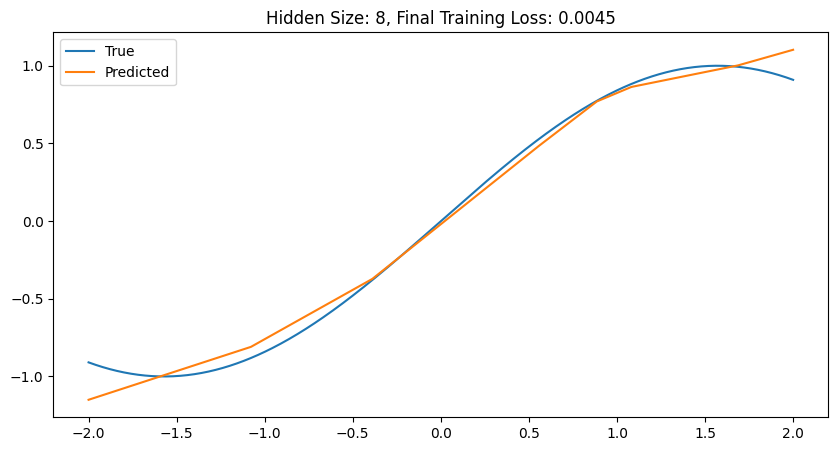

0.028 K parameters


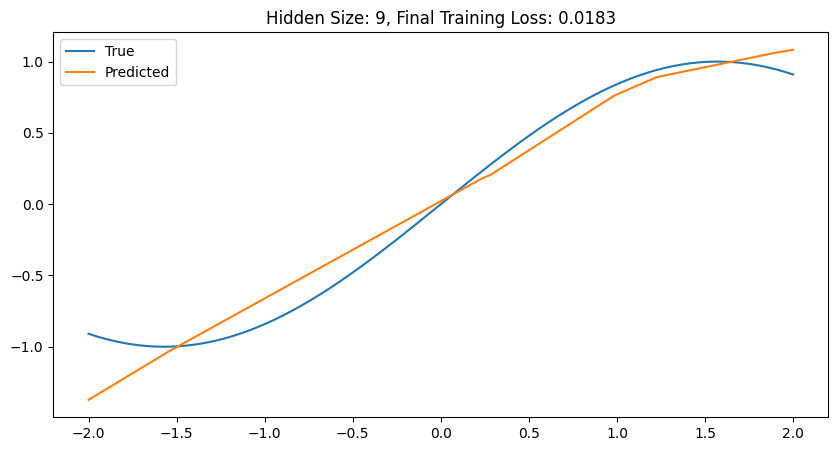

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional  as F
def func(x):
    # You can define your function here
    return torch.sin(x)

# Create training and validation data
x_train = np.linspace(-2, 2, 1000)
x_val = np.linspace(-2, 2, 500)

x_train = x_train.reshape(-1, 1).astype('float32')
x_val = x_val.reshape(-1, 1).astype('float32')

# Convert numpy arrays to PyTorch Tensors before applying the function
x_train = torch.from_numpy(x_train)
x_val = torch.from_numpy(x_val)

y_train = func(x_train)
y_val = func(x_val)



# Define our neural network
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        #self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        x = F.relu((self.fc1(x)))
        #x = self.fc2(x)
        x = self.fc3(x)
        return x


# Loss and optimizer
criterion = nn.MSELoss()

def train_and_plot(hidden_size):
    model = Net(hidden_size)
    print(sum(p.numel() for p in model.parameters())/1e3, 'K parameters')
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    
    # Train the model
    for epoch in range(1000):
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        #print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10000, loss.item()))
    
    # Get the final training loss
    final_loss = loss.item()
        
    # Validate the model
    model.eval()
    with torch.no_grad():
        predictions = model(x_val)
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(x_val.detach().numpy(), y_val.detach().numpy(), label='True')
    plt.plot(x_val.detach().numpy(), predictions.detach().numpy(), label='Predicted')
    plt.legend()
    plt.title(f'Hidden Size: {hidden_size}, Final Training Loss: {final_loss:.4f}')
    plt.show()

for i in range(1, 10):
    train_and_plot(i)

